# **Project Report Link :** https://docs.google.com/document/d/1UFAZtpozPy2tdvw-yQmvDeixXH3s8Av5pL2gsKMyfX8/edit?usp=sharing

In [68]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brendan45774/test-file")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/test-file


# **1. Data Loading**

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [70]:
df = pd.read_csv('/kaggle/input/test-file/tested.csv')

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **2. EDA**

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [46]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [73]:
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Peter, Master. Michael J",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [74]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


2.1 Visualizing Distributions

In [75]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

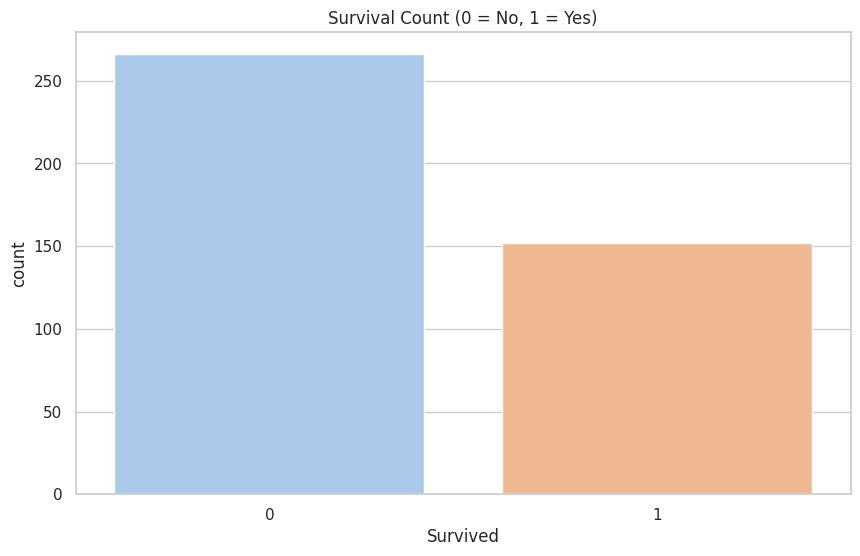

In [76]:
# Survival Count
plt.figure()
sns.countplot(x='Survived', data=df, hue='Survived', palette='pastel', legend=False)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

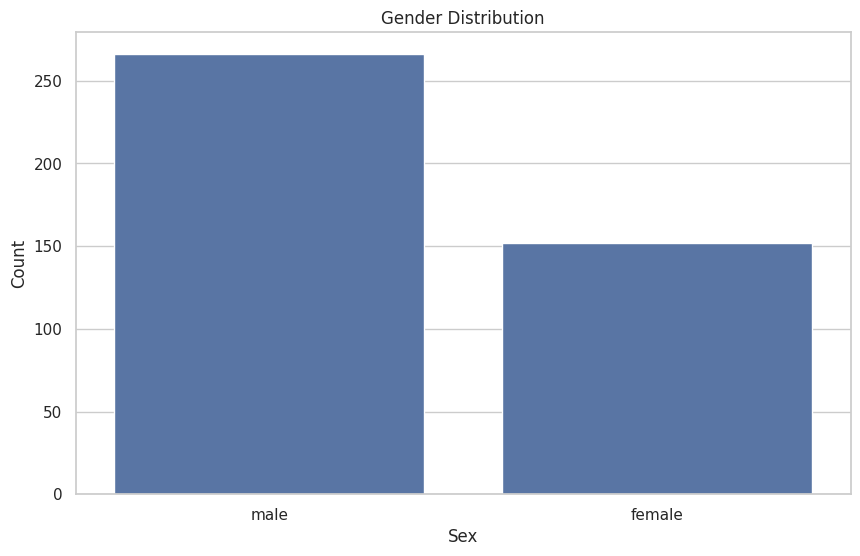

In [77]:
# Distribution of gender
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

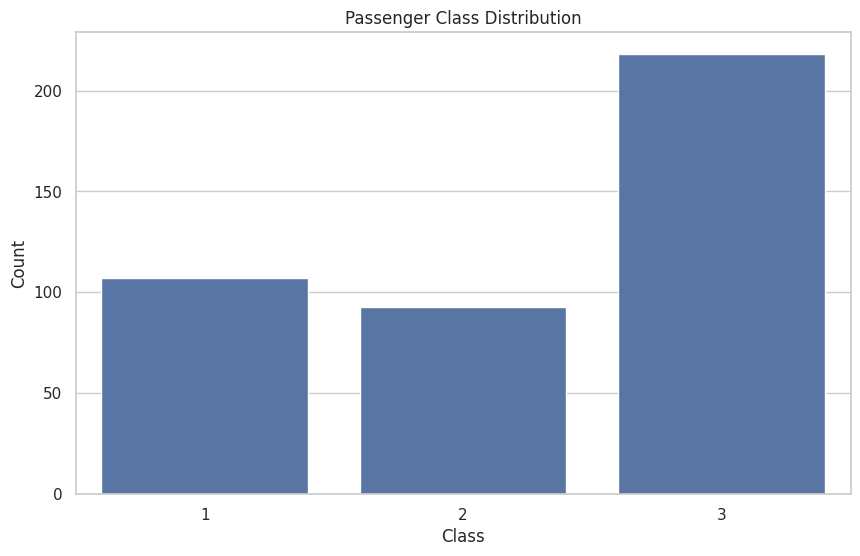

In [78]:
# Distribution of passenger class
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

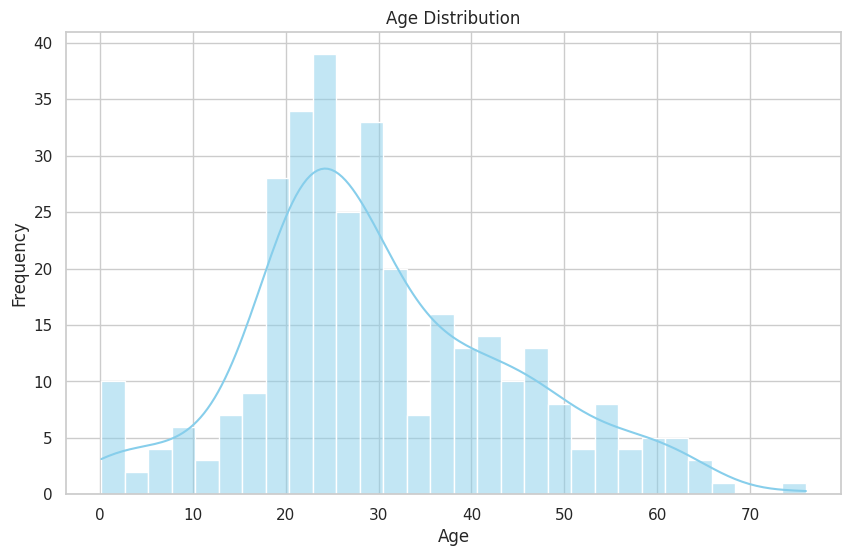

In [79]:
# Distribution of age
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

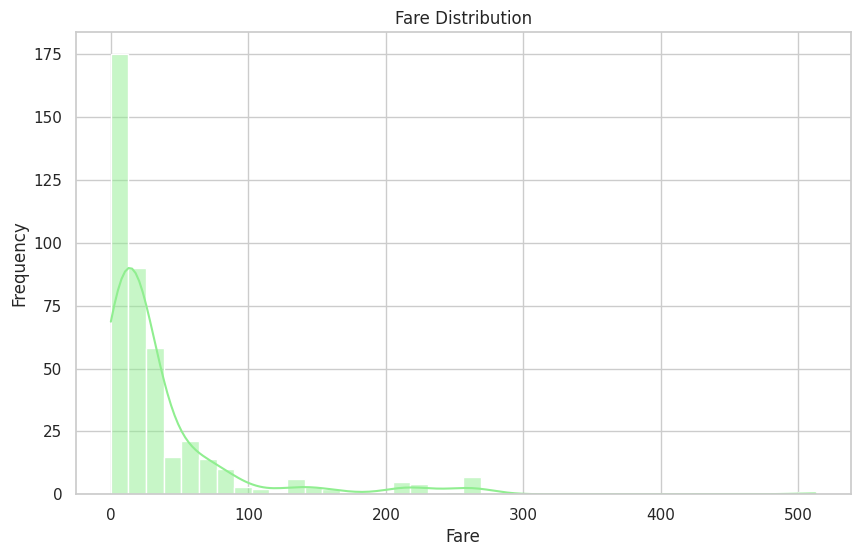

In [80]:
# Distribution of fare
sns.histplot(df['Fare'], bins=40, kde=True, color='lightgreen')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

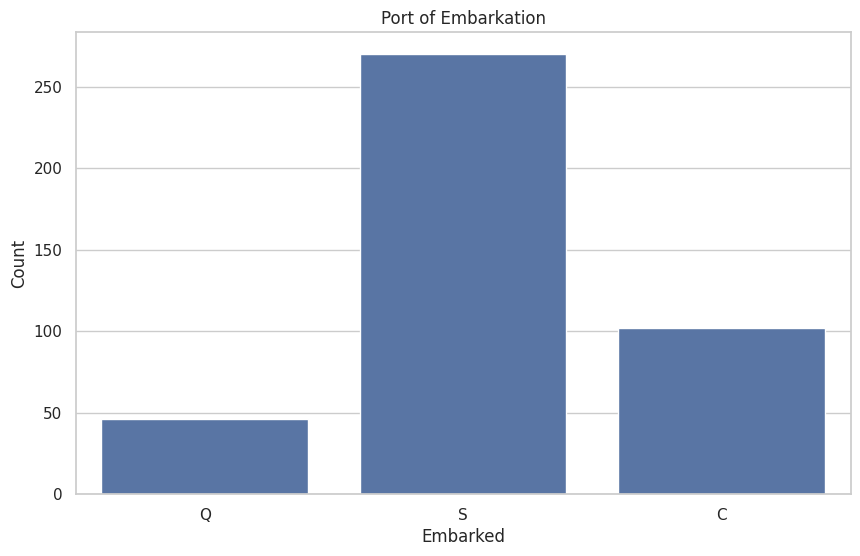

In [81]:
# Distribution of embarkation ports
sns.countplot(x='Embarked', data=df)
plt.title('Port of Embarkation')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

2.2 Relation of survival with other features:

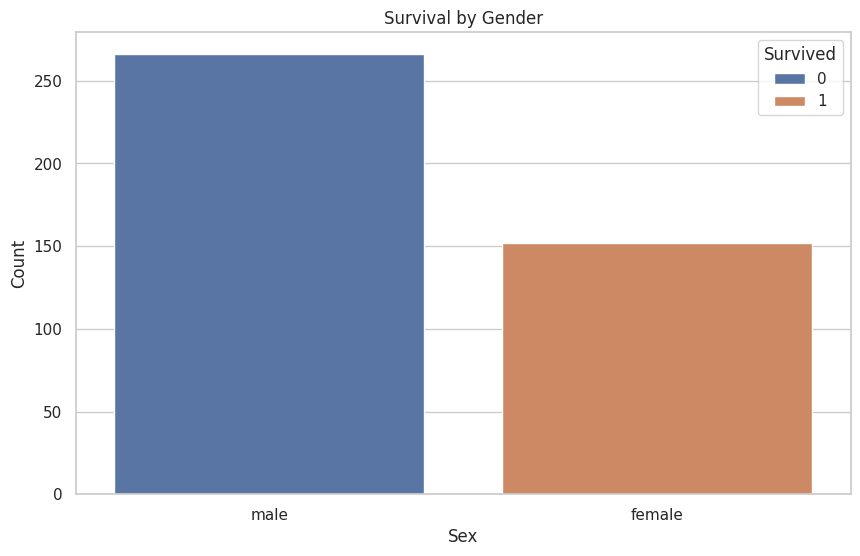

In [82]:
# Survival by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

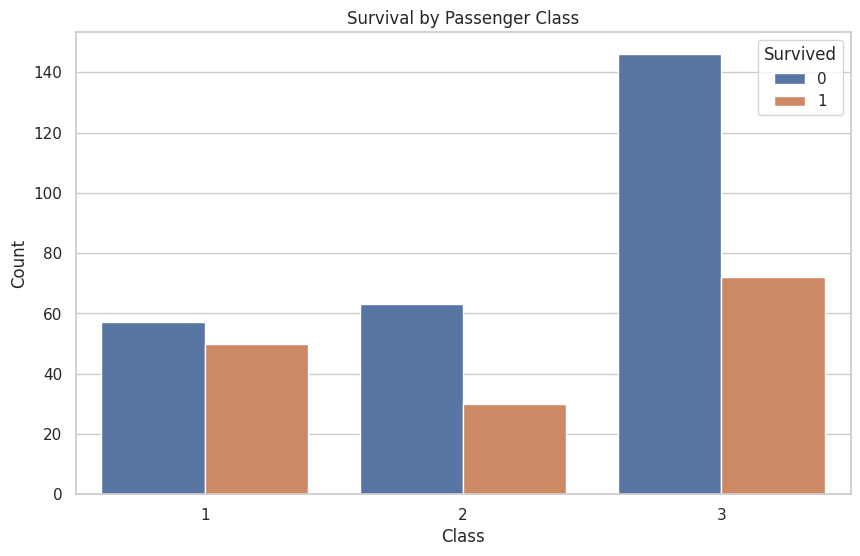

In [83]:
# Survival by passenger class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

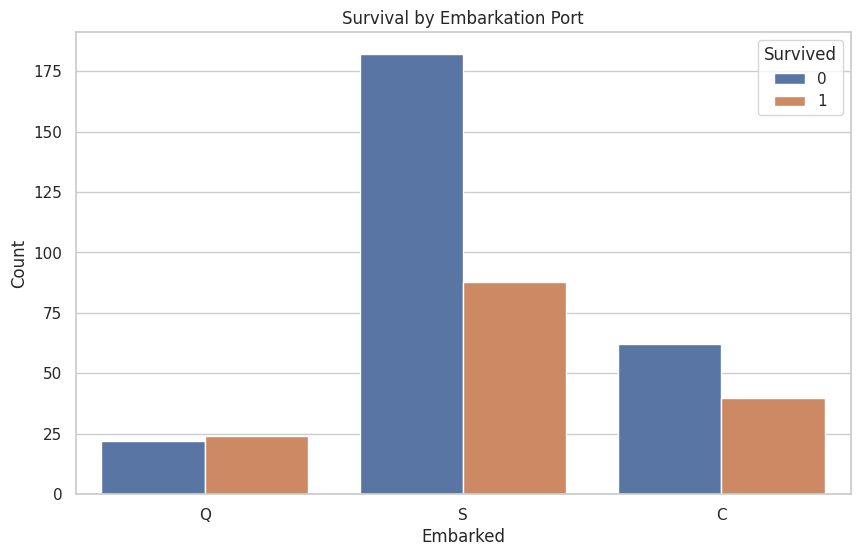

In [84]:
# Survival by embarkation port
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

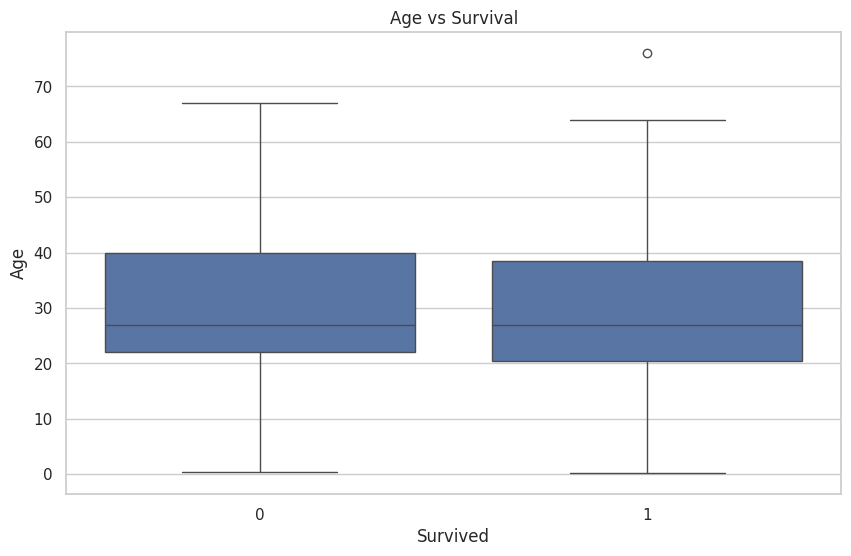

In [85]:
# Age vs survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

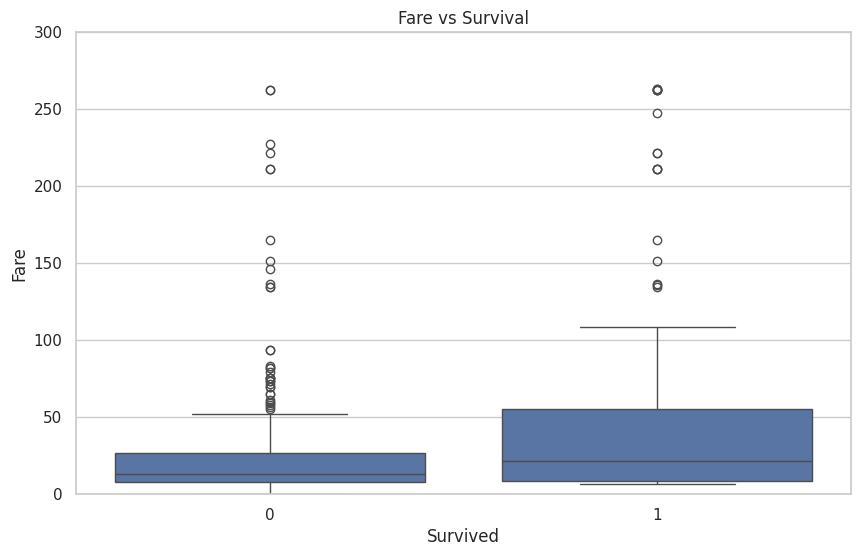

In [86]:
# Fare vs survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.ylim(0, 300)
plt.show()

# 2.3 Correlation Analysis

In [87]:
df_corr = df.copy()

In [88]:
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})

In [89]:
numerical_cols = df_corr.select_dtypes(include=np.number).columns

In [90]:
corr_matrix = df_corr[numerical_cols].corr()

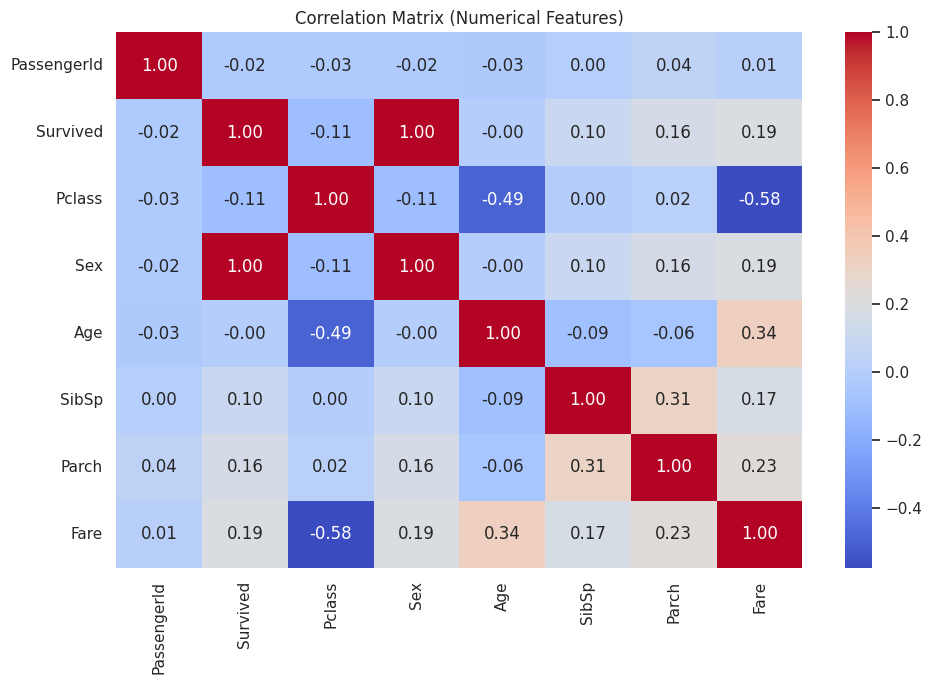

In [91]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Features)')
plt.tight_layout()
plt.show()

# **3. Data Preprocessing**

3.1 Filling in values for NAN columnd

In [92]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-92-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [93]:
fare_medians = df.groupby('Pclass')['Fare'].median().to_dict()
df['Fare'] = df.apply(lambda row: fare_medians[row['Pclass']] if pd.isna(row['Fare']) else row['Fare'], axis=1)

3.2 Converting categorical columns to numeric

In [94]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [95]:
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)

# **4. Feature Engineering**

In [96]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [97]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [108]:
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
df = df.drop(columns_to_drop, axis=1)

## **5. Model Evaluation**

5.1 Splitting the Dataset

In [109]:
x = df.drop('Survived', axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)


5.2 Scaling the features

In [111]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [112]:
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (334, 10)
Testing set shape: (84, 10)


SVM

In [120]:
svm = SVC(probability=True, random_state=42)
svm.fit(x_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [121]:
y_pred_svm = svm.predict(x_test_scaled)

In [122]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.9642857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.97      0.94      0.95        31

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84



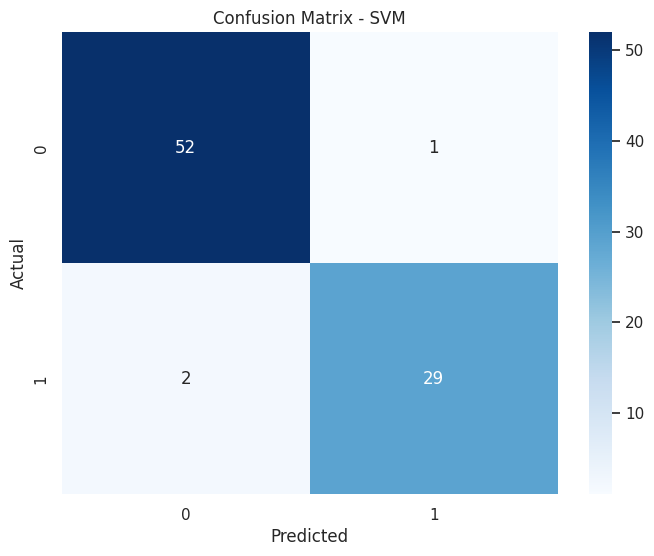

In [123]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [124]:
cv_scores_svm = cross_val_score(svm, x_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores_svm)
print("Mean CV score:", cv_scores_svm.mean())

Cross-validation scores: [0.98507463 1.         1.         0.94029851 0.98484848]
Mean CV score: 0.9820443238353687
